In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Kareem/Downloads/diabetes knn.csv")

In [3]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
###Split the dataset into features and target variable

In [10]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Make predictions
y_pred = knn.predict(X_test)

In [18]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7987012987012987
Confusion Matrix:
 [[93 14]
 [17 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
# Finding the best k value
accuracy_list = []
for k in range(1, 21):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, y, cv=5)
    accuracy_list.append(cv_scores.mean())

In [27]:
# Check if accuracy_list is populated
print("Accuracies collected:", accuracy_list)  # Debugging print statement

Accuracies collected: [0.662821492233257, 0.6940497411085647, 0.7135557253204311, 0.7213564213564213, 0.723979288685171, 0.727900857312622, 0.7357185298361768, 0.7500381970970207, 0.7422120363296834, 0.7448009506833035, 0.748731007554537, 0.7526355996944233, 0.7552584670231729, 0.7578558696205755, 0.7383668618962738, 0.7435277141159494, 0.7513708513708514, 0.748756472285884, 0.7500806383159324, 0.7487734487734488]


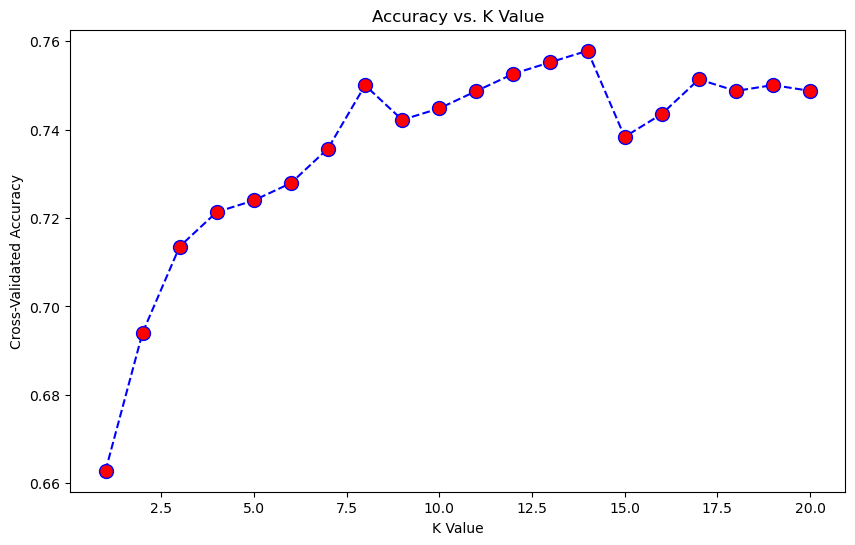

In [31]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.show()